# Ejercicio 1

A partir del dataset "preu lloguer per trimestre i barri.csv" de la web OpenDataBCN, resumirlo estadísticamente y gráficamente

Crear al menos una visualización de:
+ Una variable categórica (Distrito, Barrio)
+ Una variable numèrica (Precio)
+ Una variable numèrica i una categórica (Distrito i Precio)
+ Dues variables numèriques (Año o Trimestre, y Precio)
+ Tres variables (Barrio o Distrito, Trimestre y Precio)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gc  # "Garbage collector", para liberar memoria luego de obtener la muestra de 200000 registros.

In [2]:
alquiler_trim_barrio = pd.read_csv('preu lloguer per trimestre i barri.csv')

In [3]:
alquiler_trim_barrio

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


Observamos que los datos de alquiler medio existen en dos presentaciones: alquiler medio "bruto", y alquiler medio por metro cuadrado. Lo redistribuiremos de forma que estos dos tipos de precio sean cada uno un campo del dataframe final (y reduciremos el número de líneas a la mitad como resultado).

In [4]:
# Esta es la mitad superior del dataframe inicial.
len(alquiler_trim_barrio.loc[alquiler_trim_barrio['Lloguer_mitja'] == "Lloguer mitjà mensual (Euros/mes)"])

292

In [5]:
alquiler_trim_barrio.loc[alquiler_trim_barrio['Lloguer_mitja'] == "Lloguer mitjà mensual (Euros/mes)"]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
506,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
507,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
508,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
509,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


In [6]:
# Y esta es la mitad inferior, que contiene el alquiler promedio por metro cuadrado.
len(alquiler_trim_barrio.loc[alquiler_trim_barrio['Lloguer_mitja'] == "Lloguer mitjà per superfície (Euros/m2 mes)"])

292

In [7]:
alquiler_trim_barrio.loc[alquiler_trim_barrio['Lloguer_mitja'] == "Lloguer mitjà per superfície (Euros/m2 mes)"]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


Ahora hacemos un "merge" basándonos en esas dos partes del dataframe, de modo que generemos un nuevo dataframe que incluya los DOS tipos de precio como valor numérico: el precio "bruto" promedio de un piso, y el precio por metro cuadrado.

In [8]:
df_reorganizado = pd.merge(  # Trabajamos, digamos, con dos sub-dataframes del original, que hacen de "izquierda" y "derecha" del merge:
    alquiler_trim_barrio.loc[alquiler_trim_barrio['Lloguer_mitja'] == "Lloguer mitjà mensual (Euros/mes)"],
    alquiler_trim_barrio.loc[alquiler_trim_barrio['Lloguer_mitja'] == "Lloguer mitjà per superfície (Euros/m2 mes)"], 
    on=['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'],  # Los unimos a través de estos campos.
    # Al especificar todos esos campos en "on=[...]" nos evitamos que salgan columnas duplicadas al completar el merge
    # (pero puede haber otras maneras).
    how='outer',  # Outer, porque queremos quedarnos con todo.
#    suffixes=('_total_rent', '_per_sq_meter')
)

In [9]:
df_reorganizado

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja_x,Preu_x,Lloguer_mitja_y,Preu_y
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2,Lloguer mitjà per superfície (Euros/m2 mes),12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6,Lloguer mitjà per superfície (Euros/m2 mes),12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9,Lloguer mitjà per superfície (Euros/m2 mes),15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4,Lloguer mitjà per superfície (Euros/m2 mes),13.3
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3,Lloguer mitjà per superfície (Euros/m2 mes),15.2
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5,Lloguer mitjà per superfície (Euros/m2 mes),10.8
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8,Lloguer mitjà per superfície (Euros/m2 mes),13.8
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2,Lloguer mitjà per superfície (Euros/m2 mes),11.7


Podemos eliminar las columnas "Lloguer_mitja..." y renombrar las que se llaman "Preu_x" y "Preu_y", quedando a la postre la misma información.

In [10]:
# Or rename the existing DataFrame (rather than creating a copy) 
df_reorganizado.rename(columns={'Preu_x': 'Lloguer_preu_mitja', 'Preu_y': 'Lloguer_preu_m2'}, inplace=True)

In [11]:
df_reorganizado.drop(['Lloguer_mitja_x', 'Lloguer_mitja_y'], axis = 1, inplace=True)  # axis = 1 indica columna. Valor por defecto es "0" (filas.)

In [12]:
df_reorganizado

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_preu_mitja,Lloguer_preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7


Ahora que tenemos el dataframe un poco más organizado, cerremos el original.

In [13]:
del alquiler_trim_barrio
gc.collect()
alquiler_trim_barrio=pd.DataFrame()

In [14]:
alquiler_trim_barrio

""


¿Hay que hacer alguna cosa más con nuestro dataframe antes de proceder con el ejercicio? Veamos qué nos dice sobre eso el observar el tipo de variables que tenemos en cada columna:

In [15]:
df_reorganizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Any                 292 non-null    int64 
 1   Trimestre           292 non-null    int64 
 2   Codi_Districte      292 non-null    int64 
 3   Nom_Districte       292 non-null    object
 4   Codi_Barri          292 non-null    int64 
 5   Nom_Barri           292 non-null    object
 6   Lloguer_preu_mitja  292 non-null    object
 7   Lloguer_preu_m2     292 non-null    object
dtypes: int64(4), object(4)
memory usage: 18.4+ KB


Vemos que si queremos usarlas para representar, habría que transformar las dos últimas columnas a valores numéricos (ahora son "strings", u "object"). Si lo intentamos veremos un error, porque algunos registros contienen "--". Hay 44 registros que contienen esos dos guioncitos, 22 en cada una de las dos columnas con precios:

In [16]:
len(df_reorganizado[df_reorganizado["Lloguer_preu_mitja"] == "--"])

22

In [17]:
len(df_reorganizado[df_reorganizado["Lloguer_preu_m2"] == "--"])

22

Los convertimos a "NaN", con los cuales Pandas tiene formas de lidiar y ya no nos dará error.

In [18]:
df_reorganizado.replace('--', np.nan, inplace=True)

Ahora sí, convertimos los precios de alquiler a "float" para poder trabajar con ellos.

In [19]:
df_reorganizado["Lloguer_preu_mitja"] = df_reorganizado["Lloguer_preu_mitja"].astype(float)

In [20]:
df_reorganizado["Lloguer_preu_m2"] = df_reorganizado["Lloguer_preu_m2"].astype(float)

In [21]:
for column in df_reorganizado:   # Para examinar los valores "únicos" de las columnas.
    print(df_reorganizado[column].unique())

[2021]
[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10]
['Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]
['el Raval' 'el Barri Gòtic' 'la Barceloneta'
 'Sant Pere, Santa Caterina i la Ribera' 'el Fort Pienc'
 'la Sagrada Família' "la Dreta de l'Eixample"
 "l'Antiga Esquerra de l'Eixample" "la Nova Esquerra de l'Eixample"
 'Sant Antoni' 'el Poble Sec' 'la Marina del Prat Vermell'
 'la Marina de Port' 'la Font de la Guatlla' 'Hostafrancs' 'la Bordeta'
 'Sants - Badal' 'Sants' 'les Corts' 'la Maternitat i Sant Ramon'
 'Pedralbes' 'Vallvidrera, el Tibidabo i les Planes' 'Sarrià'
 'les Tres Torres' 'Sant Gervasi - la Bonanova' 'Sant Gervasi - Galvany'
 'el Putxet i el Farró' 'Vallc

In [22]:
df_reorganizado.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Lloguer_preu_mitja,Lloguer_preu_m2
count,292.0,292.000000,292.000000,292.000000,270.000000,270.000000
mean,2021.0,2.500000,6.246575,37.000000,871.593704,12.720741
std,0.0,1.119953,2.793123,21.107481,221.192799,1.701480
min,2021.0,1.000000,1.000000,1.000000,447.500000,6.700000
25%,2021.0,1.750000,4.000000,19.000000,742.475000,11.625000
50%,2021.0,2.500000,7.000000,37.000000,816.350000,12.750000
75%,2021.0,3.250000,8.000000,55.000000,934.525000,13.600000
max,2021.0,4.000000,10.000000,73.000000,1816.500000,18.000000


Tenemos 292 registros, todos referidos al año 2021. Así que podríamos eliminar el campo año, si quisiéramos. Sí tenemos los cuatro trimestres del año, eso sí varía. Vemos que hay diez distritos diferentes, y setenta y tres barrios.

Con respecto de los estadísticos obtenidos podemos para el alquiler promedio por piso completo en función de barrio y distrito podemos decir:
* Que el alquiler promedio en toda la ciudad es de 871,60 euros al mes, con una desviación estándar de 221,20 euros (esto señala una variabilidad relativamente importante).
* Los valores máximo y mínimo de alquiler son 447,50 y 1816,50, respectivamente.
* La mediana del alquiler, a veces asimilable "al valor más frecuente" y equivalente al valor del "segundo cuartil", es de 816,35 euros al mes. Hay una diferencia apreciable respecto al valor promedio.
* Que el promedio sea más alto que la mediana, nos sugiere que tal vez hay una serie de pisos con precio bastante más alto que el resto, y que "tiran hacia arriba" del precio promedio del alquiler.
* Observar el cuarto cuartil parecería apoyar esto (hay una gran diferencia entre el tercer cuartil y el cuarto cuartil: de 934.52 hasta 1816.50).

Respecto del alquiler por metro cuadrado según el barrio y el distrito:
* Tomando todos los datos, el precio medio por metro cuadrado en la ciudad de un piso en alquiler es de 12,7 euros/metro cuadrado.
* En este caso, la mediana es mucho más cercana que antes al promedio: 12,75.
* Además, la desviación estándar en este apartado es solo de 1,70 euros/metro cuadrado. En términos relativos, es una variabilidad menor que la del precio por piso completo.
* Aún así el último cuartil sigue viéndose algo "disparado", en comparación con los otros tres.
* No obstante ello, que el valor promedio y el valor de la mediana sean muy cercanos, sugiere que el último cuartil no contiene tantos valores extremos como para generar diferencias importantes entre ellas.

Una conclusión tentativa de todo esto es que, posiblemente tenemos toda una serie de pisos que tienen precios de alquiler "disparados", y que esa diferencia posiblemente se explique, sobre todo por su extensión, y en menor proporción, por que tengan un precio por metro cuadrado mucho más alto., 

Estas son las conclusiones que podríamos sugerir "a ciegas".  Pero veremos algunas representaciones gráficas, algunas de las cuales nos dirán si lo que nos han sugerido los estadísticos en efecto tiene reflejo en la realidad.

In [23]:
df_reorganizado

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_preu_mitja,Lloguer_preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7


Pero pasemos a ver algunas representaciones. Seguimos el orden, según se nos ha pedido en el ejercicio. Primero la representación de una **variable categórica** (Barrio). Podemos por ejemplo representar la cantidad de barrios por distrito.

Para representar el número de barrios por distrito, podemos hacer un "count()" contando el número de variables diferentes englobadas bajo cada combinación "Nom_districte"-"Trimestre".

Como el número total de barrios es el mismo en cualquier trimestre (salvo que haya una reorganización administrativa, cosa infrecuente), nos basamos un trimestre cualquiera (p.ej. el trimestre uno) para determinar el número de barrios que tiene cada distrito.

In [24]:
# Seleccionamos los campos en que el trimestre sea "uno", y agrupamos por nombre de distrito.
# Del resultado nos quedamos con el número de códigos de distrito:
distritos_barrios = df_reorganizado[(df_reorganizado['Trimestre'] == 1)].groupby(['Nom_Districte'])['Codi_Barri'].count()

In [25]:
distritos_barrios2 = df_reorganizado[(df_reorganizado['Trimestre'] == 1)].groupby(['Nom_Districte']).count()

In [26]:
distritos = []
contaje_barrios = []

for distrito in df_reorganizado['Nom_Districte'].unique():  # En base al nombre de distrito, prcedemos.
    distritos.append(distrito)
    cuenta = df_reorganizado[(df_reorganizado['Trimestre'] == 1) & (df_reorganizado['Nom_Districte'] == distrito)].groupby(['Nom_Districte'])['Nom_Barri'].count()
    print(df_reorganizado[(df_reorganizado['Trimestre'] == 1) & (df_reorganizado['Nom_Districte'] == distrito)].groupby(['Nom_Districte'])['Nom_Barri'].count())
    contaje_barrios.append(cuenta[0])  # Para que nos quede una lista plana con números

Nom_Districte
Ciutat Vella    4
Name: Nom_Barri, dtype: int64
Nom_Districte
Eixample    6
Name: Nom_Barri, dtype: int64
Nom_Districte
Sants-Montjuïc    8
Name: Nom_Barri, dtype: int64
Nom_Districte
Les Corts    3
Name: Nom_Barri, dtype: int64
Nom_Districte
Sarrià-Sant Gervasi    6
Name: Nom_Barri, dtype: int64
Nom_Districte
Gràcia    5
Name: Nom_Barri, dtype: int64
Nom_Districte
Horta-Guinardó    11
Name: Nom_Barri, dtype: int64
Nom_Districte
Nou Barris    13
Name: Nom_Barri, dtype: int64
Nom_Districte
Sant Andreu    7
Name: Nom_Barri, dtype: int64
Nom_Districte
Sant Martí    10
Name: Nom_Barri, dtype: int64


In [27]:
distritos[1]

'Eixample'

In [28]:
contaje_barrios

[4, 6, 8, 3, 6, 5, 11, 13, 7, 10]

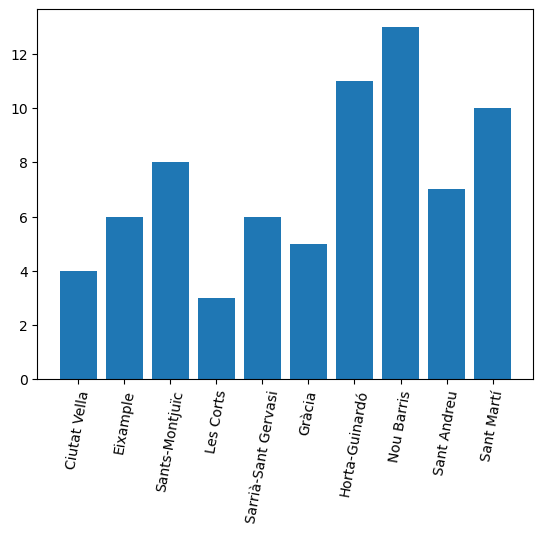

In [29]:
plt.bar(distritos, contaje_barrios)
plt.xticks(rotation=80)
plt.show()

Podemos observar que el distrito con más barrios es Nou Barris, seguido de Horta-Guinardó y Sant Martí.

Bien, después de posiblemente haber dado más vueltas de lo necesario una vez más para obtener lo anterior, representemos ahora un caso diferente, una **variable numérica**. Podríamos por ejemplo representar con un histograma la frecuencia de los diferentes precios que hay (lógicamente estableciendo unos "bins" en los cuales entraría cada valor concreto, ya que los precios que tenemos no son valores enteros, sino que abarcan un" continuo".

In [30]:
df_reorganizado.head(3)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_preu_mitja,Lloguer_preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5


Text(0.5, 1.0, 'Histograma de la frecuencia de precios promedios de alquiler:')

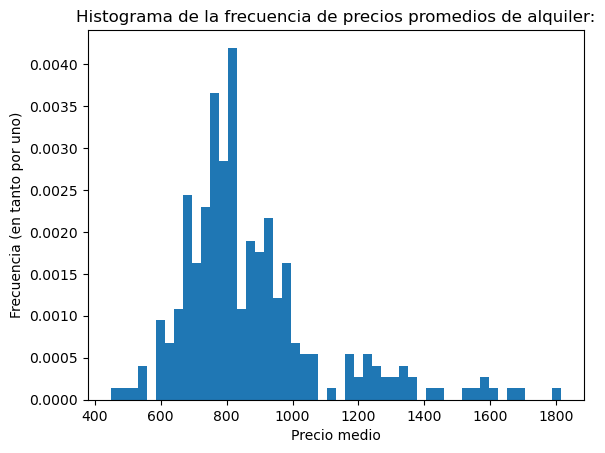

In [31]:
# Nos basamos en la documentación de:
# https://matplotlib.org/3.1.1/gallery/statistics/histogram_features.html#sphx-glr-gallery-statistics-histogram-features-py

#Lienzo(s)
fig, ax = plt.subplots()
# El histograma de los datos
num_bins = 50
n, bins, patches = ax.hist(df_reorganizado['Lloguer_preu_mitja'], num_bins, density=1)
#ax.plot(bins, y, '--')
ax.set_xlabel('Precio medio')
ax.set_ylabel('Frecuencia (en tanto por uno)')
ax.set_title(r'Histograma de la frecuencia de precios promedios de alquiler:')


¿Qué nos dice esta representación? Pues, que tenemos un grueso de precios de alquiler alrededor de los ochocientos euros, mientras que hay una "cola" que va subiendo a pisos de precios más altos.

Podemos pensar que los pisos en barrios con alquiler medio más alto tienen algo "diferente": ¿más exclusivos, más grandes, más ajardinados, o bien simplemente están ubicados en zonas de mayor renta...?

En todo caso, la "cola" que vemos parece coherente con lo que podíamos anticipar en base a observar los estadísticos que nveíamos de analizar los datos disponibles.

Sigamos: veamos ahora una representación que incluya **una variable numérica y una categórica**.

In [32]:
df_reorganizado.head(3)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_preu_mitja,Lloguer_preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5


In [33]:
alquiler_medio_distrito = []

for distrito in distritos:  # En base al nombre de distrito, prcedemos.
    #distritos.append(distrito)  Reutilizaremos esta lista, de antes.
    media_distrito = df_reorganizado[(df_reorganizado['Nom_Districte'] == distrito)].groupby(['Nom_Districte'])['Lloguer_preu_mitja'].mean()
    print(df_reorganizado[(df_reorganizado['Nom_Districte'] == distrito)].groupby(['Nom_Districte'])['Lloguer_preu_mitja'].mean())
    alquiler_medio_distrito.append(media_distrito[0])  # Para que nos quede una lista plana con números


Nom_Districte
Ciutat Vella    858.925
Name: Lloguer_preu_mitja, dtype: float64
Nom_Districte
Eixample    1000.545833
Name: Lloguer_preu_mitja, dtype: float64
Nom_Districte
Sants-Montjuïc    798.932143
Name: Lloguer_preu_mitja, dtype: float64
Nom_Districte
Les Corts    1214.066667
Name: Lloguer_preu_mitja, dtype: float64
Nom_Districte
Sarrià-Sant Gervasi    1271.2125
Name: Lloguer_preu_mitja, dtype: float64
Nom_Districte
Gràcia    877.265
Name: Lloguer_preu_mitja, dtype: float64
Nom_Districte
Horta-Guinardó    765.0075
Name: Lloguer_preu_mitja, dtype: float64
Nom_Districte
Nou Barris    664.2925
Name: Lloguer_preu_mitja, dtype: float64
Nom_Districte
Sant Andreu    721.196154
Name: Lloguer_preu_mitja, dtype: float64
Nom_Districte
Sant Martí    916.45
Name: Lloguer_preu_mitja, dtype: float64


In [34]:
print(distritos, alquiler_medio_distrito)

['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris', 'Sant Andreu', 'Sant Martí'] [858.925, 1000.5458333333335, 798.9321428571428, 1214.0666666666666, 1271.2124999999999, 877.265, 765.0074999999999, 664.2925, 721.1961538461538, 916.45]


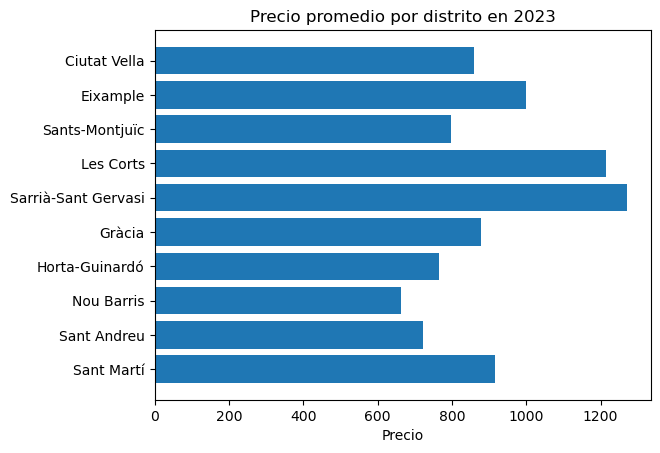

In [35]:
# Fixing random state for reproducibility

plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(distritos))

ax.barh(y_pos, alquiler_medio_distrito)
ax.set_yticks(y_pos)
ax.set_yticklabels(distritos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Precio')
ax.set_title('Precio promedio por distrito en 2023')

plt.show()

Representemos ahora **dos variables numéricas**. Por ejemplo, representemos el valor del alquiler promedio por barrio en función del alquiler promedio por metro cuadrado en el barrio en cuestión.

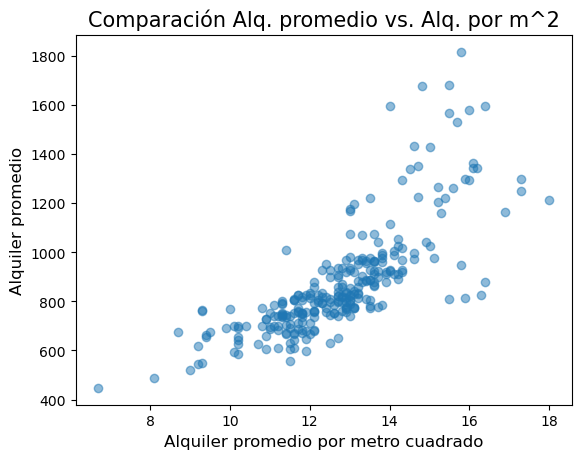

In [36]:
df_reorganizado['Lloguer_preu_mitja'], df_reorganizado['Lloguer_preu_m2']

x = df_reorganizado['Lloguer_preu_m2']
y = df_reorganizado['Lloguer_preu_mitja']
# colors = np.random.rand(N)
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

fig, ax = plt.subplots()

plt.scatter(x, y, alpha=0.5)

ax.set_xlabel(r'Alquiler promedio por metro cuadrado', fontsize=12)
ax.set_ylabel(r'Alquiler promedio', fontsize=12)
ax.set_title('Comparación Alq. promedio vs. Alq. por m^2', fontsize=15)

plt.show()

Podemos ver en el gráfico anterior que hay una tendencia no lineal, pero al menos no "disparada" entre alquiler promedio y precio promedio del metro cuadrado, en la parte izquierda del gráfico.

En cambio, si nos fijamos en el tercio derecho del gráfico, vemos como moderados incrementos del precio cuadrado promedio van aparejados a grandes incrementos del precio promedio de los pisos. Se desprende que los pisos que entran en esa parte del gráfico, aparte de ser más grandes, tienen alguna otra característica que dispara su precio.

Bien, veamos ahora, para finalizar un gráfico que incluya **tres variables**, por ejemplo barrio/distrito, trimestre y precio.

In [37]:
# Creamos cuatro listas vacías, una para cada trimestre, que usaremos para la representación:
precio_trimestre_1 = []
precio_trimestre_2 = []
precio_trimestre_3 = []
precio_trimestre_4 = []

# Podemos las listas vacías en otra lista:
precio_trimestres = [precio_trimestre_1, precio_trimestre_2, precio_trimestre_3, precio_trimestre_4]


In [38]:
# Recorremos en paralelo, la lista de listas y un rango de uno a cinco (que para en el cuatro):
for trim, i in zip(precio_trimestres, range(1,5)):   # Es muy útil esto del "zip"!!
    print(trim)  # Lista inicialmente vacía.
    print(i) # Trimestre sobre el cual añadiremos información a la lista vacía.
    # Añadimos a continuación, por orden, el precio promedio del alquiler en cada distrito, en el trimestre que estemos mirando.
    for element in df_reorganizado[(df_reorganizado['Trimestre'] == i)].groupby(['Nom_Districte'])['Lloguer_preu_mitja'].mean():
        trim.append(element)

[]
1
[]
2
[]
3
[]
4


In [39]:
distritos

['Ciutat Vella',
 'Eixample',
 'Sants-Montjuïc',
 'Les Corts',
 'Sarrià-Sant Gervasi',
 'Gràcia',
 'Horta-Guinardó',
 'Nou Barris',
 'Sant Andreu',
 'Sant Martí']

In [40]:
# El resultado es que tenemos cuatro listas con el precio promedio, por trimestre, en cada distrito.
precio_trimestres

[[844.275,
  980.7833333333334,
  867.8799999999999,
  754.63,
  1171.9333333333334,
  665.72,
  731.15,
  901.7700000000001,
  799.2714285714285,
  1320.5666666666668],
 [846.3,
  990.5,
  868.32,
  761.35,
  1194.6333333333332,
  652.2,
  699.2714285714285,
  871.5899999999999,
  791.2285714285715,
  1231.8833333333334],
 [863.5,
  1004.4666666666667,
  888.4799999999999,
  776.1,
  1272.1333333333334,
  668.8100000000001,
  725.3333333333334,
  941.0600000000001,
  803.4142857142857,
  1239.6666666666667],
 [881.625,
  1026.4333333333334,
  884.3799999999999,
  767.95,
  1217.5666666666666,
  670.4399999999999,
  731.0428571428572,
  951.3799999999999,
  801.8142857142857,
  1292.7333333333333]]

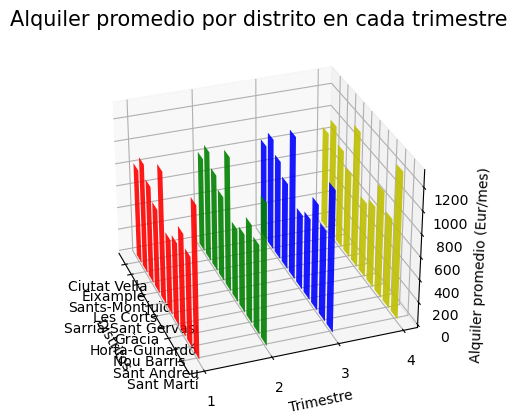

In [41]:
# Adaptado de: https://matplotlib.org/3.1.1/gallery/mplot3d/bars3d.html#sphx-glr-gallery-mplot3d-bars3d-py

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
trimestres = [1, 2, 3, 4]


# Combina colores y trimestres, por orden
for c, trimestre in zip(colors, trimestres):
    # Generate the random data for the y=k 'layer'.
    xs = distritos
    ys = precio_trimestres[trimestre-1]

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=trimestre, zdir='y', color=cs, alpha=0.9)
    # Valor de equis, valor de y .... y más cosas

ax.set_xlabel('Distritos')
ax.set_ylabel('Trimestre')
ax.set_zlabel('Alquiler promedio (Eur/mes)')

ax.set_title('Alquiler promedio por distrito en cada trimestre', fontsize=15)
ax.set_xticks(distritos)
ax.set_yticks(trimestres)
ax.view_init(30, -20)  # Aquí se especifica el ángulo en que se ve la representación.

# Para exportar el fichero:
plt.savefig('C:/Users/karel/Desktop/IT Academy Data Science/my_plot.png')
# Para mostrarlo (importante que esté después de lo anterior, o si no, el fichero salvado saldrá en blanco).
plt.show()


Aunque esta representación es un poco dificil de leer, podemos ver en algún caso una cierta fluctuación del precio, por ejemplo en la columna más cercana al lector, "Sant Martí", el segundo trimestre se ve como disminuye, para volver a subir a continuación.

Esto contrasta con algunas otras, en que el precio se va elevando levemente y de forma continua (p.ej. "Ciutat Vella", la columna más alejada).

# Ejercicio 2

Exportar los gráficos como imagen o como HTML.

La manera de hacer esto sería incorporar el siguiente código (con el nombre de fichero que corresponda) al final de cada gráfica/figura, pero poner este trozo de código ANTES de plt.show(). Es importante que sea en este orden, porque si no, el gráfico salvado aparecerá en blanco.

In [81]:
plt.savefig('C:/Users/karel/Desktop/IT Academy Data Science/my_plot.png')  # O bien, a la carpeta de interés, o en su defecto, a la carpeta de trabajo.

<Figure size 640x480 with 0 Axes>

Se ha incorporado esto mismo al código del apartado anterior como demostración. En cada caso, se trataría de seguir la misma lógica: indicar que se desea guardar la gráfica, dónde se quiere guardar y con qué nombre de fichero, y poner el trozo de código ANTES de la instrucción de mostrar el "plot".

# Ejercicio 3

Proponer alguna visualización interesante a partir de los datos de trabajo.

In [84]:
df_reorganizado

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_preu_mitja,Lloguer_preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7


Un dato que podríamos obtener, como una aproximación si quisiéramos hacernos una idea del tamaño promedio de los pisos en cada distrito, podría ser la relación entre el alquiler promedio, y el precio promedio del metro cuadrado.

De ese modo, si dividimos la columna del alquiler promedio entre la columna del precio por metro cuadrado, obtendremos al menos un valor orientativo del área promedio de los pisos en cada barrio, en metros cuadrados.

In [42]:
df_reorganizado["estimacion_area"] = df_reorganizado['Lloguer_preu_mitja']/df_reorganizado['Lloguer_preu_m2']

In [43]:
df_reorganizado

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_preu_mitja,Lloguer_preu_m2,estimacion_area
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8,59.312500
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3,75.577236
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5,52.187097
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3,66.120301
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9,71.162791
...,...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2,79.296053
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8,64.861111
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8,70.855072
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7,70.615385


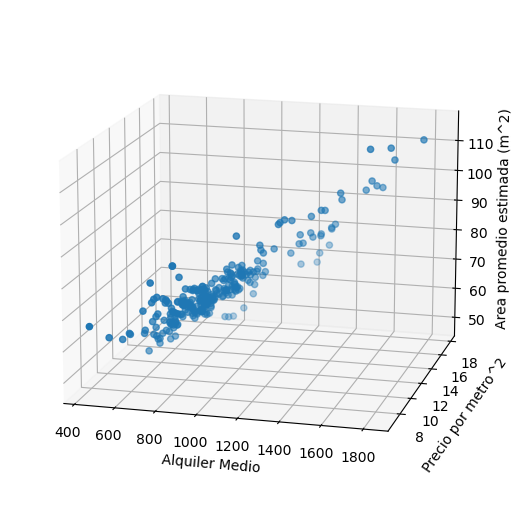

In [63]:
# https://pythonguides.com/matplotlib-3d-scatter/
fig = plt.figure(figsize = (10, 6.5))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(df_reorganizado["Lloguer_preu_mitja"], df_reorganizado["Lloguer_preu_m2"], df_reorganizado["estimacion_area"]);  # Color determinado por el "upvote".
ax1.set_xlabel('Alquiler Medio')
ax1.set_ylabel('Precio por metro^2')
ax1.set_zlabel('Area promedio estimada (m^2)')


# OJO CON ESTO!!!
ax.set_title('Alquiler promedio, precio por m^2 y área estimada promedio', fontsize=15)
ax.set_xticks(df_reorganizado["Lloguer_preu_mitja"])
ax.set_yticks(df_reorganizado["Lloguer_preu_m2"])
ax.set_yticks(df_reorganizado["estimacion_area"])

ax1.view_init(15, -75)

La representación anterior nos muestra que hay un grueso de pisos que no tienen precios exorbitantes. A ojo, bastante más de la mitad de los alquileres promedio están aproximadamente por debajo de 1000 euros.

Obtenemos una perspectiva un poco diferente cambiando el ángulo de representación del gráfico (véase la última línea):

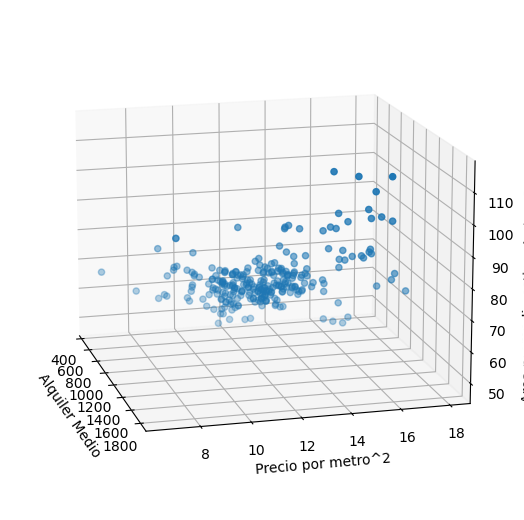

In [57]:
# https://pythonguides.com/matplotlib-3d-scatter/
fig = plt.figure(figsize = (10, 6.5))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(df_reorganizado["Lloguer_preu_mitja"], df_reorganizado["Lloguer_preu_m2"], df_reorganizado["estimacion_area"]);  # Color determinado por el "upvote".
ax1.set_xlabel('Alquiler Medio')
ax1.set_ylabel('Precio por metro^2')
ax1.set_zlabel('Area promedio estimada (m^2)')

# OJO CON ESTO!!!
ax.set_title('Alquiler promedio, precio por m^2 y área estimada promedio', fontsize=15)
ax.set_xticks(df_reorganizado["Lloguer_preu_mitja"])
ax.set_yticks(df_reorganizado["Lloguer_preu_m2"])
ax.set_yticks(df_reorganizado["estimacion_area"])
ax1.view_init(15, -15)

Desde esta perspectiva observamos lo que hemos visto, pero además podemos constatar que una cierta mayoría de las zonas con pisos más grandes está asociada además a los precios por metro cuadrado más elevados. El grueso de los pisos parece tener áreas cercanas a los 60-70 metros cuadrados.

Veámoslo desde aún otra perspectiva.

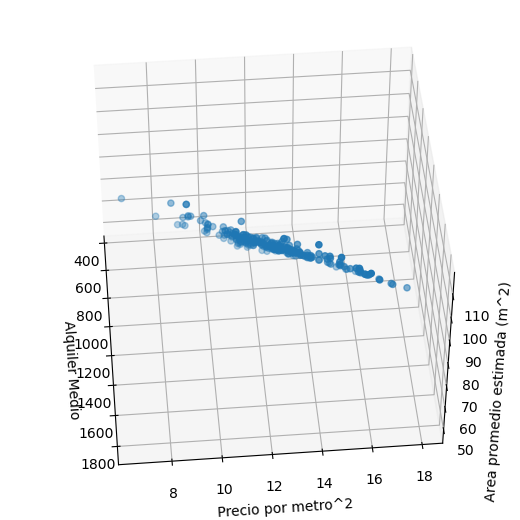

In [64]:
# https://pythonguides.com/matplotlib-3d-scatter/
fig = plt.figure(figsize = (10, 6.5))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(df_reorganizado["Lloguer_preu_mitja"], df_reorganizado["Lloguer_preu_m2"], df_reorganizado["estimacion_area"]);  # Color determinado por el "upvote".
ax1.set_xlabel('Alquiler Medio')
ax1.set_ylabel('Precio por metro^2')
ax1.set_zlabel('Area promedio estimada (m^2)')

# OJO CON ESTO!!!
ax.set_title('Alquiler promedio, precio por m^2 y área estimada promedio', fontsize=15)
ax.set_xticks(df_reorganizado["Lloguer_preu_mitja"])
ax.set_yticks(df_reorganizado["Lloguer_preu_m2"])
ax.set_yticks(df_reorganizado["estimacion_area"])
ax1.view_init(45, -5)

Esta representación es llamativa: admito que no me queda claro si es un artificio de cómo obtuvimos la aproximación del "área promedio estimada" (¿quizá sí?), o si igualmente refleja alguna particularidad de los datos. En todo caso, es llamativa la distribución de los datos en una especie de plano.

Probablemente sí que es un reflejo de que el "área promedio estimada" en realidad es una variable dependiente de las otras dos. La aparente "variabilidad" que se observa el representar el plano, simplemente será reflejo de la variabilidad del alquiler promedio y el precio promedio del metro cuadrado.

El hallazgo anterior me hace concluir que, si bien se puede obtener alguna variable "secundaria" a otras que tenemos de primera mano, hay que tener cuidado con no sobreinterpretarla, porque podríamos terminar haciendo en el fondo una especie de "razonamiento circular".